# Multiple Linear Regression
## Prediction of 'Close' Price of Google Stocks on the basis of current day's 'Open' price and previous day's 'Low' and 'Close' prices.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
dataset = pd.read_csv('Google_Stock_Price_Train.csv')

In [32]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [33]:
dataset.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [34]:
# Convert the Close prices from object to float
dataset['Close'] = dataset['Close'].str.replace(',','').astype(float)

### Shifting the 'Low' and 'Close' columns down so that each row in the X matrix contains previous day's 'Low' and 'Close' prices.

In [35]:
X = dataset[['Open', 'Low', 'Close']]
sh = [X['Low'][len(X)-1], X['Close'][len(X)-1]]
X[['Low', 'Close']] = X[['Low', 'Close']].shift(1)
X = X.iloc[1:, :].values

y = dataset['High']
y = y.iloc[1:].values

C:\Users\Anurag\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


### Making train-test split in 80:20 ratio

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Fitting the Multiple Linear Regression model

In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Making preditions on the test split

In [38]:
y_pred = regressor.predict(X_test)

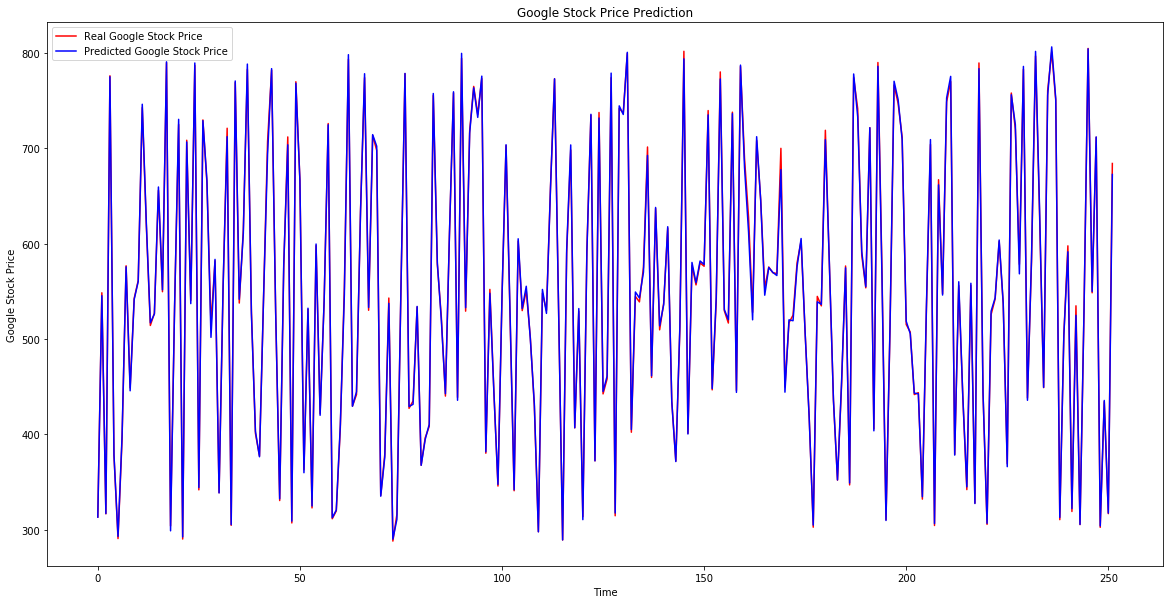

In [39]:
plt.figure(figsize = (20,10))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

### Mean squarred error

In [40]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MSE: %f' % rmse)


MSE: 4.004611
